In [0]:
#Import generic libraries
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer
from sklearn import metrics
import pandas as pd
import numpy
import warnings
# Suppress warnings from pandas library
warnings.filterwarnings("ignore", category=DeprecationWarning,module="pandas", lineno=570)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [0]:
#Topic modeling with clustering
from sklearn.cluster import KMeans, MiniBatchKMeans

In [4]:
#Topic modeling with SVD
from sklearn.decomposition import TruncatedSVD
example = ["Machine learning is super fun",
"Python is super, super cool",
"Statistics is cool, too",
"Data science is fun",
"Python is great for machine learning",
"I like football",
"Football is great to watch"]
vectorizer = CountVectorizer(min_df = 1, stop_words = 'english')
dtm = vectorizer.fit_transform(example)
dtm_data = pd.DataFrame(dtm.toarray(),index=example,columns=vectorizer.get_feature_names())
dtm_data.head(10)

,cool,data,football,fun,great,learning,like,machine,python,science,statistics,super,watch
Machine learning is super fun,0,0,0,1,0,1,0,1,0,0,0,1,0
"Python is super, super cool",1,0,0,0,0,0,0,0,1,0,0,2,0
"Statistics is cool, too",1,0,0,0,0,0,0,0,0,0,1,0,0
Data science is fun,0,1,0,1,0,0,0,0,0,1,0,0,0
Python is great for machine learning,0,0,0,0,1,1,0,1,1,0,0,0,0
I like football,0,0,1,0,0,0,1,0,0,0,0,0,0
Football is great to watch,0,0,1,0,1,0,0,0,0,0,0,0,1


In [5]:
# Get words that correspond to each column
vectorizer.get_feature_names()

['cool',
 'data',
 'football',
 'fun',
 'great',
 'learning',
 'like',
 'machine',
 'python',
 'science',
 'statistics',
 'super',
 'watch']

In [0]:
# Fit LSA. Use algorithm = “randomized” for large datasets
lsa = TruncatedSVD(2, algorithm = 'arpack')
dtm_lsa = lsa.fit_transform(dtm.asfptype())
#dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)
#pd.DataFrame(lsa.components_,index = ["component_1","component_2"],columns = vectorizer.get_feature_names())

In [7]:
dtm_lsa

array([[ 1.57247271, -0.47650694],
       [ 2.01590517,  1.21491855],
       [ 0.31817376,  0.46663292],
       [ 0.29469888, -0.297151  ],
       [ 1.24575812, -1.21014931],
       [ 0.03797199, -0.38114092],
       [ 0.2405853 , -0.99233284]])

In [8]:
pd.DataFrame(dtm_lsa, index = example, columns = ["component_1","component_2"])

,component_1,component_2
Machine learning is super fun,1.572473,-0.476507
"Python is super, super cool",2.015905,1.214919
"Statistics is cool, too",0.318174,0.466633
Data science is fun,0.294699,-0.297151
Python is great for machine learning,1.245758,-1.210149
I like football,0.037972,-0.381141
Football is great to watch,0.240585,-0.992333


In [0]:
xs = [w[0] for w in dtm_lsa]
ys = [w[1] for w in dtm_lsa]

Populating the interactive namespace from numpy and matplotlib


<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'First principal component')

Text(0, 0.5, 'Second principal component')

Text(0.5, 1.0, 'Plot of points against LSA principal components')

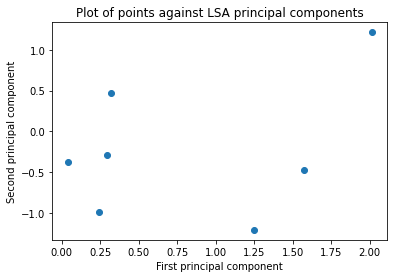

In [10]:
#Visualize the points on the orthogonal plot
%pylab inline
import matplotlib.pyplot as plt
figure()
plt.scatter(xs,ys)
xlabel('First principal component')
ylabel('Second principal component')
title('Plot of points against LSA principal components')

In [11]:
# Compute document similarity using LSA components
similarity = np.asarray(numpy.asmatrix(dtm_lsa) * numpy.asmatrix(dtm_lsa).T)
df  = pd.DataFrame(similarity,index=example, columns=example).head(10)
df

,Machine learning is super fun,"Python is super, super cool","Statistics is cool, too",Data science is fun,Python is great for machine learning,I like football,Football is great to watch
Machine learning is super fun,2.699729,2.591039,0.277966,0.605000,2.535565,0.241326,0.851167
"Python is super, super cool",2.591039,5.539901,1.208329,0.233071,1.041097,-0.386507,-0.720606
"Statistics is cool, too",0.277966,1.208329,0.318981,-0.044895,-0.168328,-0.165771,-0.386507
Data science is fun,0.605000,0.233071,-0.044895,0.175146,0.726721,0.124447,0.365773
Python is great for machine learning,2.535565,1.041097,-0.168328,0.726721,3.016375,0.508541,1.500582
I like football,0.241326,-0.386507,-0.165771,0.124447,0.508541,0.146710,0.387354
Football is great to watch,0.851167,-0.720606,-0.386507,0.365773,1.500582,0.387354,1.042606


In [16]:
# Clustering the training sentences with K-means technique
modelkmeans = KMeans(n_clusters=2, init='k-means++', max_iter=200, n_init=100)
modelkmeans.fit(dtm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200,
       n_clusters=2, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [22]:
#PROFILE THE CLUSTERS
print("top terms per cluster:")
order_centroids=modelkmeans.cluster_centers_.argsort()[:,::-1]
terms=vectorizer.get_feature_names()
print("feature names are"+ str(terms))
n_clusters=2
for i in range(n_clusters):
  print("Cluster %d:" % i),
  for ind in order_centroids[i,:10]:
    print('%s'%terms[ind]),
  print

top terms per cluster:
feature names are['cool', 'data', 'football', 'fun', 'great', 'learning', 'like', 'machine', 'python', 'science', 'statistics', 'super', 'watch']
Cluster 0:


(None,)

football


(None,)

watch


(None,)

statistics


(None,)

science


(None,)

like


(None,)

great


(None,)

fun


(None,)

data


(None,)

cool


(None,)

super


(None,)

<function print>

Cluster 1:


(None,)

super


(None,)

python


(None,)

machine


(None,)

learning


(None,)

great


(None,)

fun


(None,)

cool


(None,)

watch


(None,)

statistics


(None,)

science


(None,)

<function print>

In [23]:
for doc in dtm:
    print(modelkmeans.predict(doc))

[1]
[1]
[0]
[0]
[1]
[0]
[0]


In [24]:
!jupyter nbconvert MODULE4_DAY4_TopicModeling_Example.ipynb

[NbConvertApp] Converting notebook MODULE4_DAY4_TopicModeling_Example.ipynb to html
[NbConvertApp] Writing 320609 bytes to MODULE4_DAY4_TopicModeling_Example.html
